In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [ ]:
# zipcodes that get highest no of calls

In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
# Town that get highest no of calls

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [ ]:
# Reasons of the calls

In [26]:
df['title'].head(30)

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
5                   EMS: HEAD INJURY
6               EMS: NAUSEA/VOMITING
7         EMS: RESPIRATORY EMERGENCY
8              EMS: SYNCOPAL EPISODE
9        Traffic: VEHICLE ACCIDENT -
10       Traffic: VEHICLE ACCIDENT -
11       Traffic: VEHICLE ACCIDENT -
12       Traffic: VEHICLE ACCIDENT -
13       Traffic: VEHICLE ACCIDENT -
14       Traffic: VEHICLE ACCIDENT -
15       Traffic: VEHICLE ACCIDENT -
16        EMS: RESPIRATORY EMERGENCY
17                    EMS: DIZZINESS
18             EMS: VEHICLE ACCIDENT
19       Traffic: DISABLED VEHICLE -
20       Traffic: VEHICLE ACCIDENT -
21       Traffic: DISABLED VEHICLE -
22              Fire: APPLIANCE FIRE
23       Traffic: DISABLED VEHICLE -
24       Traffic: VEHICLE ACCIDENT -
25             EMS: GENERAL WEAKNESS
26                  EMS: HEAD INJURY
2

In [27]:
df['Reason']= df['title'].apply(lambda x : x.split(':')[0])
df['Reason'].head(20)

0         EMS
1         EMS
2        Fire
3         EMS
4         EMS
5         EMS
6         EMS
7         EMS
8         EMS
9     Traffic
10    Traffic
11    Traffic
12    Traffic
13    Traffic
14    Traffic
15    Traffic
16        EMS
17        EMS
18        EMS
19    Traffic
Name: Reason, dtype: object

In [28]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [31]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

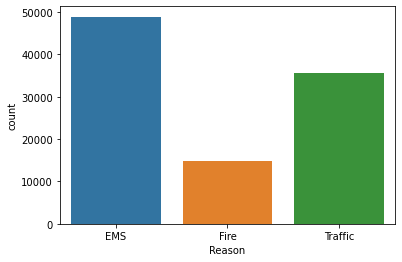

In [29]:
sns.countplot(x='Reason',data=df)

In [ ]:
# Lets look and predict the future by looking at the past.considering this as a poisson distribution lets 
# set the objective to get a prediction for how many calls will be coming and which are those times when the 
# calls will be at higher number so the emergency services can be prepared.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   reason     99492 non-null  object 
 10  Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.3+ MB


In [37]:
type(df['timeStamp'].iloc[0])

str

In [39]:
df['timeStamp']=pd.to_datetime( df['timeStamp'])

In [40]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
df['Hour']= df['timeStamp'].apply(lambda time : time.hour)
df['Month']= df['timeStamp'].apply(lambda time : time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time : time.dayofweek)

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,EMS,17,12,3


In [44]:
 df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun',}

In [46]:
 df['Day of Week'] =  df['Day of Week'].map(dmap)

In [47]:
 df['Day of Week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

In [48]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,EMS,17,12,Thu


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

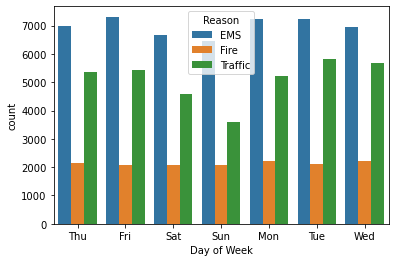

In [50]:
sns.countplot(x='Day of Week',data=df, hue = 'Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

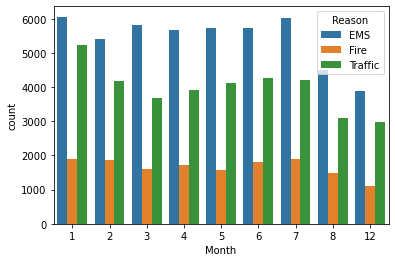

In [51]:
sns.countplot(x='Month',data=df, hue = 'Reason')

In [ ]:
# Data for 3 months is missing
# lets do a linear regression to understand and analyze better

In [54]:
 df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


In [55]:
 Bymonth = df.groupby('Month').count()
 Bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

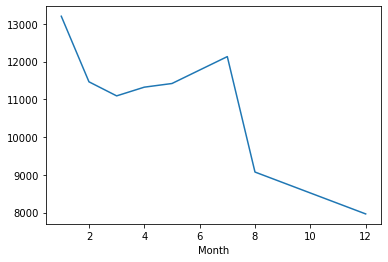

In [56]:
Bymonth['twp'].plot()

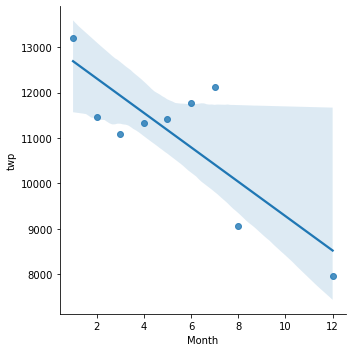

In [57]:
sns.lmplot(x='Month',y='twp',data = Bymonth.reset_index())

In [ ]:
# There is missing data so without business context it can be said that no.of calls have gone down considerably 
# but it wont be true even in linear regression thats been done the straight line be going down because we dont
# have the context of what happened between 10 or 12 so doing monthly level analysis will give poor result
# Lets try with week or day level analysis

In [62]:
DayHour = df.groupby(by= ['Day of Week','Hour']).count()['Reason'].unstack()
DayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

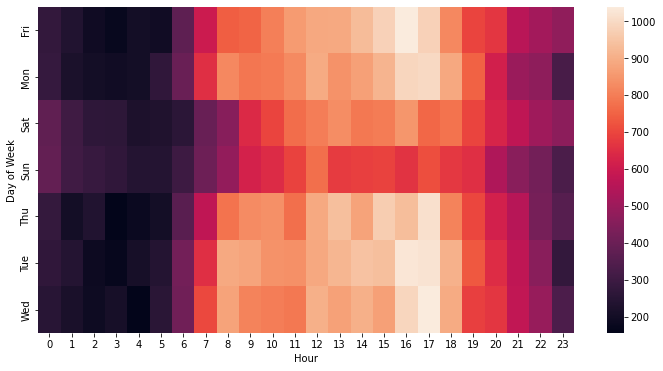

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour)

In [ ]:
# what we can analyze here is highest no of calls coming in on weekdays in daytime whereas no much activity 
# can be seen during night time but that dosen't mean that the no. of crimes happening during midnight is low when 
# applied a simple logic that just because the calls recieved during that time is low dosent necessarily mean that no.
# of crimes happened are less.But we can say when the staff needs to be prepared that is during 4 to 6 based on this 
# analysis.

In [64]:
DayMonth = df.groupby(by= ['Day of Week','Month']).count()['Reason'].unstack()
DayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

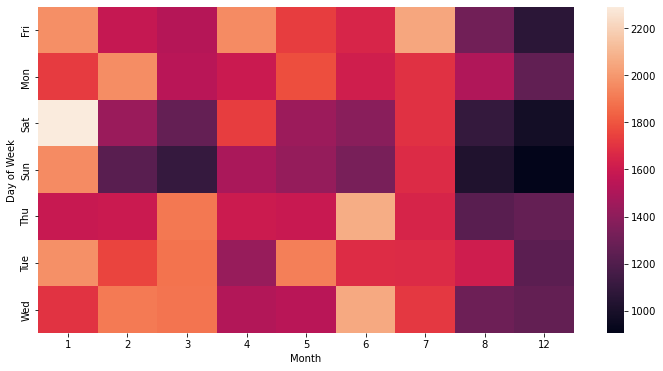

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth)